<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Data Visualization</center>

# Data Viz S3: Plotting Python 

* 1.Objetivos  
    * 1.1 Configuración del entorno  
* 2 Panda Plotting  
    * 2.1 Creamos el primer gráfico   
    * 2.2 Merge: Añadimos mas conjuntos de datos  
    * 2.3 Filtros: ¿Qué pasó en diciembre?
* 3.Utilización de Matplotlib
* 4.The matplotlib object-oriented API
    * 4.1 Tamaño, aspecto ratio DPI de Figure , guarda r figuras
    * 4.2 ¿Qué formatos están disponibles y cuáles deben usarse para la mejor calidad?
    * 4.3 Formatting text: LaTeX, tamaño y familias de fuentes
    * 4.4 Configuración de colores, anchos de lineas y tipos de lineas ,y ejes
* Anexo - Contornos, 2D Y 3D

## 1. Objetivos

Hay tres formas comunes de visualizaciones en Python:
* Si no necesita un control en profundidad del área de trazado y trazados avanzados, puede utilizar las capacidades de trazado construidas de **Pandas**.
* Si desea tener un mayor control sobre sus gráficos pero no necesita una configuración avanzada, puede usar Matplotlib a través de **pyplot**
* Finalmente, si quieres tener un control total sobre tu gráfico, puedes usar Matplotlib **orientado a objetos**

### 1.1 Configuración del entorno

Cargamos los paquetes que vamos a utilizar en la sesión.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2 Panda Plotting

Llamar a los atributo del gráfico de un DataFrame  nos permitirá trazar todos los gráficos básicos seleccionando la función correcta o especificando el atributo kind :
* ‘bar’  ‘barh’ :  barras
* ‘hist’ :  histogramas
* ‘box’ : boxplot 
* ‘kde’ : 'density' for density plots 
* ‘area’ ; area plots
* ‘scatter’ : disperso
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ : tarta 


* Utilizaremo los datos de https://movielens.org/ son tres conjuntos ,empezamos por  *u.user* son los usuarios, aquí nos viene información de qué usuarios están dados de alta en el sistema, su edad, sexo ocupación y codigo postal. 

Más adelante uniremos estos datasets en un solo dataframe
<img src="dataframes.png" style="height: 400px">

In [2]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,
                    encoding='latin-1')
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Creamos el primer gráfico 



#### Histograma por edades

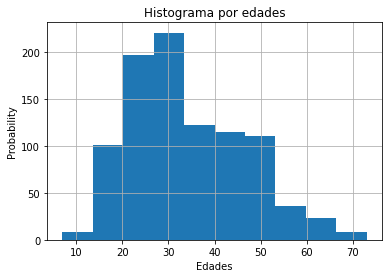

In [3]:
plt.hist(users.age)
plt.xlabel('Edades')
plt.ylabel('Probability')
plt.title('Histograma por edades')
plt.grid(True)

Como hemos visto anteriormente hay multiples formas de crear un gráfico.   
Creamos un gráfico de densidad

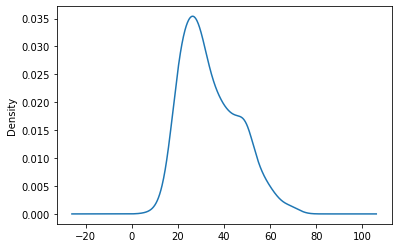

In [4]:
# El gráfico de densidad muestra la probabilidad de cada uno de los valores. la suma del area total siempre será 1. 

users.age.plot(kind="kde")


#### Gráfico de barras :  Usuarios hombres y mujeres

¿Cuantos usuarios hombres y cuantos usuarios mujeres tenemos?  
En este caso queremos contar el user_id ( para ello utilizamos np.size o 'count' por sexo) . 

  

In [10]:

campos_filas=['sex']
#campos_columnas=['aqui la variable'] no es necesario ya que sólo trabajamos con una dimensión 
#Opcion1 
campos_valores=['user_id']
#agregados={np.size}
agregados=np.size
by_sex=pd.pivot_table(users,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    values=campos_valores, 
                                    aggfunc=agregados)
by_sex

,user_id
sex,
F,273
M,670


* **Groupby** 

Grupo de series. La función dada agrupa y  devuelve resultados como series, o por una serie de columnas.  

Existe muchas más formas de crearlo. 
Quédate con la que más te guste. 

¿Como lo visualizamos como tarta?

In [11]:
by_sex = users.groupby("sex").size()
by_sex


sex
F    273
M    670
dtype: int64

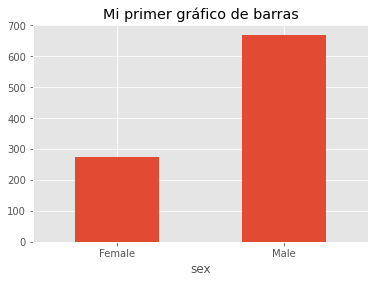

In [12]:

my_plotb = by_sex.plot(kind='bar' )
my_plotb.set_xticklabels(['Female', 'Male'],rotation=0)
my_plotb.set_title("Mi primer gráfico de barras")
plt.style.use("ggplot")



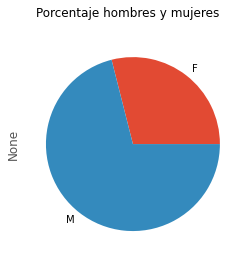

In [13]:
my_plotp = by_sex.plot(kind='pie',subplots=True ,title="Porcentaje hombres y mujeres" )
plt.style.use("ggplot")

#### Nos interesa tambien ver que ocupacion tienen por sexo ( horizontal la ocupacion)
Ahora lo subdividimos por ocupacion 

In [15]:

campos_filas=['occupation']
campos_columnas=['sex']
campos_valores=['user_id']
agregados=np.size

occupation_group=pd.pivot_table(users,
                                    index=campos_filas,
                                    columns=campos_columnas,
                                    values=campos_valores, 
                                    aggfunc=agregados)
occupation_group.head(5)

user_id      
sex                 F     M
occupation                 
administrator    36.0  43.0
artist           13.0  15.0
doctor            NaN   7.0
educator         26.0  69.0
engineer          2.0  65.0

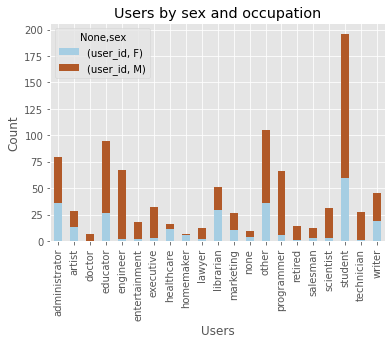

In [16]:
occ_plot = occupation_group.plot(kind='bar',
                                           stacked=True,
                                           colormap='Paired',
                                           title="Users by sex and occupation")
occ_plot.set_xlabel("Users")
occ_plot.set_ylabel("Count")

plt.show()

In [17]:

campos_filas=['sex']
campos_columnas=['occupation']
campos_valores=['user_id']
agregados=np.size

sex_group=pd.pivot_table(users,
                                    index=campos_filas,
                                    columns=campos_columnas,
                                    values=campos_valores, 
                                    aggfunc=agregados)
sex_group.head(10)

user_id                                                \
occupation administrator artist doctor educator engineer entertainment   
sex                                                                      
F                   36.0   13.0    NaN     26.0      2.0           2.0   
M                   43.0   15.0    7.0     69.0     65.0          16.0   

                                                  ...                       \
occupation executive healthcare homemaker lawyer  ... marketing none other   
sex                                               ...                        
F                3.0       11.0       6.0    2.0  ...      10.0  4.0  36.0   
M               29.0        5.0       1.0   10.0  ...      16.0  5.0  69.0   

                                                                            
occupation programmer retired salesman scientist student technician writer  
sex                                                                         
F                 6.0     1.0      3.0       3.0    60.0        1.0   19.0  
M                60.0    13.0      9.0      28.0   136.0       26.0   26.0  

[2 rows x 21 columns]

In [19]:
labels_raw=list(sex_group.columns.values)
labels_raw

[('user_id', 'administrator'),
 ('user_id', 'artist'),
 ('user_id', 'doctor'),
 ('user_id', 'educator'),
 ('user_id', 'engineer'),
 ('user_id', 'entertainment'),
 ('user_id', 'executive'),
 ('user_id', 'healthcare'),
 ('user_id', 'homemaker'),
 ('user_id', 'lawyer'),
 ('user_id', 'librarian'),
 ('user_id', 'marketing'),
 ('user_id', 'none'),
 ('user_id', 'other'),
 ('user_id', 'programmer'),
 ('user_id', 'retired'),
 ('user_id', 'salesman'),
 ('user_id', 'scientist'),
 ('user_id', 'student'),
 ('user_id', 'technician'),
 ('user_id', 'writer')]

In [21]:
from ast import literal_eval
labels=[( i[-1]) for i in labels_raw]
labels

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

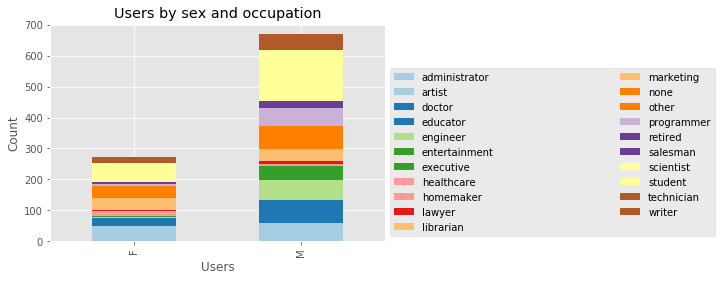

In [14]:
sex_plot = sex_group.plot(kind='bar',legend=None,
                                           stacked=True,
                                           colormap='Paired',
                                           title="Users by sex and occupation")
sex_plot.set_xlabel("Users")
sex_plot.set_ylabel("Count")


sex_plot.legend(labels,bbox_to_anchor=(1., 0., 1., .105), loc=3,
           ncol=2, mode="expand")

plt.show()

### 2.2 Merge:  Añadimos mas conjuntos de datos
####  Clasificaciones de peliculas - Ratings
En este dataset de *u.data*  nos vienen los id de los usuarios y los id de las películas que han visto.   

Además de una puntuación del 1 al 5 de cada usuario a cada película y cuando vieron dicha película. 

In [22]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Como ya tenemos los id de cada película queremos saber de qué pelicula se trata.   
Así que añadimos el dataset *u.item* donde viene información de cada película ( titulo y fecha de salida)

#### Películas  - titulos

In [23]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


#### Puntuación de películas 

In [24]:
#create the large dataframe
movie_ratings = pd.merge(movies, ratings)

movie_ratings.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324


In [25]:
lens = pd.merge(movie_ratings, users)
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


Una vez cargados los datos debemos inspeccionarlos, antes de empezar nuestro análisis.

In [26]:
lens.describe()

,movie_id,video_release_date,user_id,rating,unix_timestamp,age
count,100000.000000,0.0,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,943.00000,5.000000,8.932866e+08,73.000000


In [20]:
# quitamos una serie de columnas
drop_list = ['imdb_url', 'video_release_date']
lens = lens.drop(drop_list, axis=1)
lens.head()

,movie_id,title,release_date,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,308,5,887736696,60,M,retired,95076


In [21]:
lens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        100000 non-null  int64 
 1   title           100000 non-null  object
 2   release_date    99991 non-null   object
 3   user_id         100000 non-null  int64 
 4   rating          100000 non-null  int64 
 5   unix_timestamp  100000 non-null  int64 
 6   age             100000 non-null  int64 
 7   sex             100000 non-null  object
 8   occupation      100000 non-null  object
 9   zip_code        100000 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.4+ MB


In [27]:
lens['unix_timestamp'] = pd.to_datetime(lens.unix_timestamp, unit='s')

lens.head()



,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,1998-02-17 17:31:36,60,M,retired,95076


Añadimos dos columnas con dia y mes 


In [29]:
lens['day'] = lens['unix_timestamp'].dt.strftime('%d')
lens['month'] = lens['unix_timestamp'].dt.strftime('%m')
lens

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,day,month
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076,17,02
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,1998-02-17 17:51:30,60,M,retired,95076,17,02
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,1998-02-17 18:20:08,60,M,retired,95076,17,02
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,1998-02-17 18:07:27,60,M,retired,95076,17,02
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,1998-02-17 17:31:36,60,M,retired,95076,17,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,1998-04-22 23:10:38,19,M,student,56567,22,04
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,1998-04-22 23:05:38,19,M,student,56567,22,04
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,1998-04-22 23:04:59,19,M,student,56567,22,04
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,1998-04-22 23:08:31,19,M,student,56567,22,04


### 2.3 Filtros 
#### ¿Que perfil de cliente es más joven ?


In [31]:
# ¿que perfil de cliente es más joven ?
#Histograma de edades y sexo ( Filtramos users por sex=='M' o 'F')
women=users[(users['sex'] == 'F')]
men=users[(users['sex'] == 'M')]


(array([  6.,  61., 154., 160.,  86.,  78.,  69.,  27.,  22.,   7.]),
 array([ 7. , 13.6, 20.2, 26.8, 33.4, 40. , 46.6, 53.2, 59.8, 66.4, 73. ]),
 <a list of 10 Patch objects>)

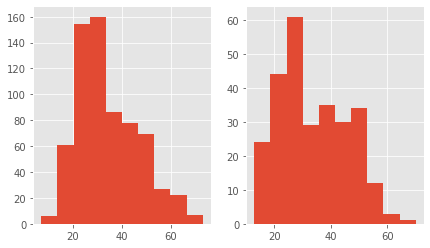

In [32]:
# Lo primero creamos una figura con n_filas y n_columnas
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(7, 4))
# cada celda de la matriz la podemos 
ax1 = axes[1]
ax1.hist(women.age)
ax2 = axes[0]
ax2.hist(men.age) 

Ahora supón que estás mirando el histograma desde arriba.
¿Como sería la imagen?

{'whiskers': [<matplotlib.lines.Line2D at 0x12d584d90>,
 'caps': [<matplotlib.lines.Line2D at 0x12d50b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d584790>],
 'medians': [<matplotlib.lines.Line2D at 0x12d513350>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d513890>],
 'means': []}

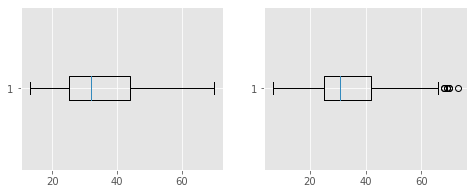

In [33]:
# Lo primero creamos una figura con n_filas y n_columnas
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(8,3))
# cada celda de la matriz la podemos 
ax1 = axes[0]
ax1.boxplot(women.age,vert=False)
ax2 = axes[1]
ax2.boxplot(men.age,vert=False) 

Una explicación muy sencilla del boxplot es imaginar un histograma visto desde arriba, además nos detalla la información dividida en quartiles. 

## 1. Series Temporales 
### Evolución películas

In [38]:
# Graficamos 
#Offset Aliases D,W,M,Q,SMS,B...
# Funcion resample , funciona para indices

from datetime import timedelta
lens.index = lens['unix_timestamp']
fecha=pd.Grouper(key='unix_timestamp', freq='m')

#maxfecha=clasificacion.index.max()
#minfecha= maxfecha - timedelta(weeks=10)
fecha

TimeGrouper(key='unix_timestamp', freq=<MonthEnd>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0)

In [37]:
campos_filas=[fecha]
#campos_columnas=['aqui la variable']
campos_valores=['movie_id']
agregados={pd.Series.nunique}

titulos=pd.pivot_table(lens,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    values=campos_valores, # en caso de utilizar la opción 2 asterisca esta linea
                                    aggfunc=agregados)
titulos.head(5)

,movie_id
,nunique
unix_timestamp,
1997-09-30,1044
1997-10-31,1141
1997-11-30,1340
1997-12-31,1255
1998-01-31,1365


Como veis, en Python hay muchas formas de sacar la misma información, puedes seleccionar la que más se adapte a tus necesidades

In [39]:
titulos=lens.groupby(fecha)['movie_id'].nunique()
titulos



unix_timestamp
1997-09-30    1044
1997-10-31    1141
1997-11-30    1340
1997-12-31    1255
1998-01-31    1365
1998-02-28    1323
1998-03-31    1280
1998-04-30    1327
Freq: M, Name: movie_id, dtype: int64

Una vez que tenemos la matriz pivotada, vemos que la lectura con el gráfico es mucho más sencilla

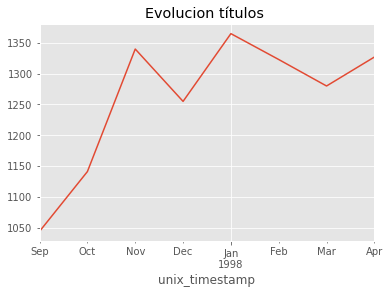

In [40]:
titulos.plot(title='Evolucion títulos ')


Utilizando en vez de nunique , el cual nos dice los títulos que hay , utilizamos el count, este nos dice cuantos alquiles ha habido , es decir un mismo título puede haberse alquilado más de una vez. 

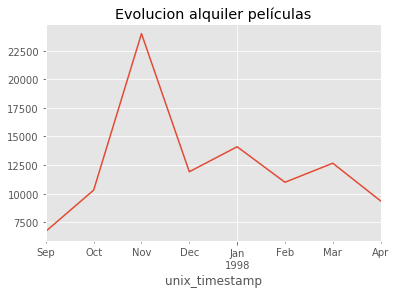

In [31]:
alquileres=lens.groupby(fecha)['movie_id'].count()
alquileres.plot(title='Evolucion alquiler películas')

Vemos la diferencia entre contar las películas vistas y los alquileres . 
Utilizamos **Filtro**
* Lo veremos más adelante en detalle 

La película **"Toy Story (1995)"** un mismo día se ha alquilado 4 veces

In [41]:
# Filtramos 
day1=lens[(lens['day'] == '17')&(lens['month'] == '02') &(lens['movie_id']==1)]
day1

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,day,month
unix_timestamp,,,,,,,,,,,,,,
1998-02-17 17:28:52,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076,17,02
1998-02-17 20:00:22,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,327,4,1998-02-17 20:00:22,22,M,student,11101,17,02
1998-02-17 15:57:32,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,210,5,1998-02-17 15:57:32,39,M,engineer,03060,17,02
1998-02-17 19:26:51,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,393,3,1998-02-17 19:26:51,19,M,student,83686,17,02


In [42]:
peliculas_19980217=day1.groupby(fecha)['movie_id'].nunique()
alquileres_19980217=day1.groupby(fecha)['movie_id'].count()
print("Peliculas vistas",peliculas_19980217)
print("Alquileres",alquileres_19980217)

Peliculas vistas unix_timestamp
1998-02-28    1
Freq: M, Name: movie_id, dtype: int64
Alquileres unix_timestamp
1998-02-28    4
Freq: M, Name: movie_id, dtype: int64


#### ¿Qué pasó en Diciembre?

* Graficamos la evolucion de los alquileres cada día. 

In [43]:
# filtramos mes de diciembre
lens_dic=lens[(lens['unix_timestamp'] > '1997-12-01') & (lens['unix_timestamp'] < '1998-01-01')]
lens_dic['unix_date'] = lens_dic['unix_timestamp'].dt.strftime('%m/%d/%Y')
lens_dic.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,day,month,unix_date
unix_timestamp,,,,,,,,,,,,,,,
1997-12-31 20:48:44,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,1997-12-31 20:48:44,23,M,student,80521,31,12,12/31/1997
1997-12-31 20:49:15,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,66,3,1997-12-31 20:49:15,23,M,student,80521,31,12,12/31/1997
1997-12-31 20:47:45,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,66,4,1997-12-31 20:47:45,23,M,student,80521,31,12,12/31/1997
1997-12-31 20:50:56,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,66,3,1997-12-31 20:50:56,23,M,student,80521,31,12,12/31/1997
1997-12-31 20:58:59,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,66,1,1997-12-31 20:58:59,23,M,student,80521,31,12,12/31/1997


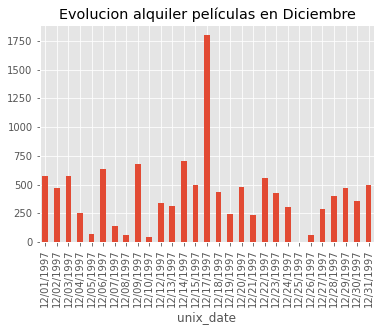

In [44]:
dic=lens_dic.groupby('unix_date')['movie_id'].count()
dic.plot(kind='bar',title='Evolucion alquiler películas en Diciembre')

### Añadimos ahora sexo para ver quienes alquilan mas películas. 


In [45]:

campos_indices=['day']
campos_columnas=['sex']
campos_valores=['movie_id']

dic_sex=pd.pivot_table(lens_dic,
                        index=campos_indices,
                        columns=campos_columnas,
                        values=campos_valores,
                       aggfunc='count')
#                        aggfunc=lambda x: len(x.unique()))

dic_sex.head()


movie_id       
sex        F      M
day                
01     167.0  407.0
02     190.0  277.0
03      25.0  546.0
04      69.0  182.0
05       NaN   72.0

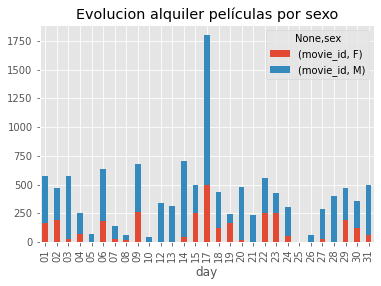

In [54]:
dic_sex.plot(kind='bar',title='Evolucion alquiler películas por sexo',stacked=True)


La misma información apilada y no apilada

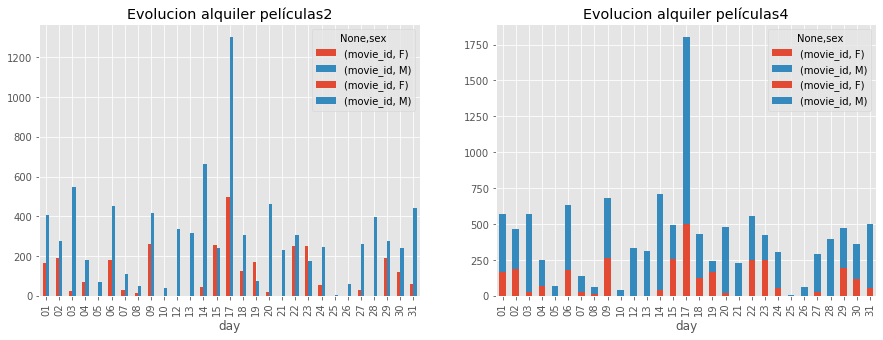

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=[15,5])
evol_nov=dic_sex
evol_dic=dic_sex
nov_sex=dic_sex
evol_nov.plot(ax=axes[0],kind='bar',title='Evolucion alquiler películas1')
evol_dic.plot(ax=axes[0],kind='bar',title='Evolucion alquiler películas2')
nov_sex.plot(ax=axes[1],kind='bar',title='Evolucion alquiler películas3',stacked=True)
dic_sex.plot(ax=axes[1],kind='bar',title='Evolucion alquiler películas4',stacked=True)

In [39]:
### 3. Agrupaciones
## Crear agrupacion por edades

In [62]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
#Creamo una nueva columna en lens asignandole un valor a cada clave. 
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
#lens[['age', 'age_group']].drop_duplicates()[:10]

In [56]:
lens.head(5)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,day,month,age_group
unix_timestamp,,,,,,,,,,,,,,,
1998-02-17 17:28:52,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076,17,02,60-69
1998-02-17 17:51:30,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,1998-02-17 17:51:30,60,M,retired,95076,17,02,60-69
1998-02-17 18:20:08,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,1998-02-17 18:20:08,60,M,retired,95076,17,02,60-69
1998-02-17 18:07:27,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,1998-02-17 18:07:27,60,M,retired,95076,17,02,60-69
1998-02-17 17:31:36,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,1998-02-17 17:31:36,60,M,retired,95076,17,02,60-69


In [57]:
age_rating=lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

In [43]:
age_rating.head()

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772

In [44]:
###  creamos el gráfico que mejor se adapte

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1303adfd0>,
      dtype=object)

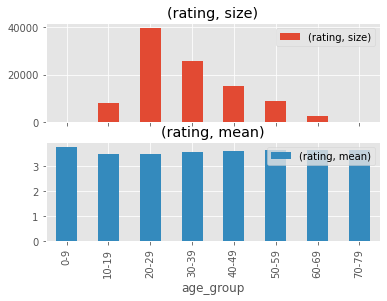

In [63]:
age_rating.plot(kind='bar',subplots=True)

In [59]:
age_size=lens.groupby('age_group').agg({'rating': [np.size]})
age_mean=lens.groupby('age_group').agg({'rating': [np.mean]})

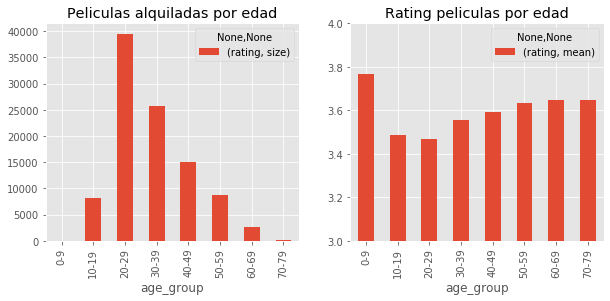

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=[10,4])
age_size.plot(ax=axes[0],kind='bar',title='Peliculas alquiladas por edad')
age_mean.plot(ax=axes[1],kind='bar',title='Rating peliculas por edad',ylim=(3,4))
#plt.ylim(3,5)

In [52]:
### ¿Cuales son las 50 películas más alquiladas?

In [65]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]
most_50.head()

movie_id
50     583
258    509
100    508
181    507
294    485
dtype: int64

In [66]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,day,month,age_group
unix_timestamp,,,,,,,,,,,,,,,
1998-02-17 17:28:52,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076,17,02,60-69
1998-02-17 17:51:30,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,1998-02-17 17:51:30,60,M,retired,95076,17,02,60-69
1998-02-17 18:20:08,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,1998-02-17 18:20:08,60,M,retired,95076,17,02,60-69
1998-02-17 18:07:27,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,1998-02-17 18:07:27,60,M,retired,95076,17,02,60-69
1998-02-17 17:31:36,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,1998-02-17 17:31:36,60,M,retired,95076,17,02,60-69


In [68]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

KeyError: "None of [DatetimeIndex(['1970-01-01 00:00:00.000000050',\n               '1970-01-01 00:00:00.000000258',\n               '1970-01-01 00:00:00.000000100',\n               '1970-01-01 00:00:00.000000181',\n               '1970-01-01 00:00:00.000000294',\n               '1970-01-01 00:00:00.000000286',\n               '1970-01-01 00:00:00.000000288',\n               '1970-01-01 00:00:00.000000001',\n               '1970-01-01 00:00:00.000000300',\n               '1970-01-01 00:00:00.000000121',\n               '1970-01-01 00:00:00.000000174',\n               '1970-01-01 00:00:00.000000127',\n               '1970-01-01 00:00:00.000000056',\n               '1970-01-01 00:00:00.000000007',\n               '1970-01-01 00:00:00.000000098',\n               '1970-01-01 00:00:00.000000237',\n               '1970-01-01 00:00:00.000000117',\n               '1970-01-01 00:00:00.000000172',\n               '1970-01-01 00:00:00.000000222',\n               '1970-01-01 00:00:00.000000313',\n               '1970-01-01 00:00:00.000000204',\n               '1970-01-01 00:00:00.000000405',\n               '1970-01-01 00:00:00.000000079',\n               '1970-01-01 00:00:00.000000210',\n               '1970-01-01 00:00:00.000000151',\n               '1970-01-01 00:00:00.000000173',\n               '1970-01-01 00:00:00.000000069',\n               '1970-01-01 00:00:00.000000168',\n               '1970-01-01 00:00:00.000000748',\n               '1970-01-01 00:00:00.000000269',\n               '1970-01-01 00:00:00.000000257',\n               '1970-01-01 00:00:00.000000195',\n               '1970-01-01 00:00:00.000000423',\n               '1970-01-01 00:00:00.000000009',\n               '1970-01-01 00:00:00.000000318',\n               '1970-01-01 00:00:00.000000276',\n               '1970-01-01 00:00:00.000000302',\n               '1970-01-01 00:00:00.000000022',\n               '1970-01-01 00:00:00.000000096',\n               '1970-01-01 00:00:00.000000328',\n               '1970-01-01 00:00:00.000000025',\n               '1970-01-01 00:00:00.000000015',\n               '1970-01-01 00:00:00.000000118',\n               '1970-01-01 00:00:00.000000183',\n               '1970-01-01 00:00:00.000000216',\n               '1970-01-01 00:00:00.000000176',\n               '1970-01-01 00:00:00.000000064',\n               '1970-01-01 00:00:00.000000234',\n               '1970-01-01 00:00:00.000000202',\n               '1970-01-01 00:00:00.000000028'],\n              dtype='datetime64[ns]', name='unix_timestamp', freq=None)] are in the [index]"

In [69]:
most_by_age=by_age.rating.mean().unstack(1).fillna(0)[:5]
by_age=most_by_age.plot(kind='bar', legend=None, stacked=True)
by_age.legend(bbox_to_anchor=(1., 0., 1., .105), loc=3,
           ncol=2, mode="expand")

NameError: name 'by_age' is not defined

## 3. Utilización de Matplotlib

Matplotlib es el paquete base para los gráficos de Python ya que tiene la mayoría de los tipos de trazado ya codificados y le permite personalizar cada aspecto del área de trazado mediante su API de OOP.

Si no está muy cómodo con la notación de objetos y no necesita su potencia, matplotlib proporciona una interfaz basada en comandos llamada pyplot que se puede usar para construir gráficos simples rápidamente.

In [60]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### 3.1 Interfaz Pyplot
* Conjunto de funcioines listas o arrays que operan sobre una gráfica
* Personalizacion de lineas,colores,leyendas
* Otros tipos de datos

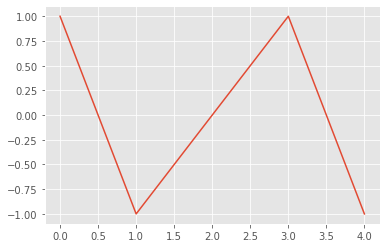

In [61]:
# funciones plot asumen que x es primero y despues son los valores de y
plt.plot([1,-1,0,1,-1])
#plt.plot([0,10,20,30,40],[1,-1,0,1,-1])

In [62]:
#plt.plot([0,1,2,3,1],[1,-1,0,1,-1])

#plt.plot([0,1,2,3,1],[1,-1,0,1,-1])


#def f(x):
#return np.exp(-x**2)
#x=np.linspace ( -1,5,num=1000)
#pl.plot(x,f(x))

#esta pintando array con respecto a otro array. 
#plt.xlabel("Eje x") 
#plt.ylabel("f(x)")



$f(x)= e^{-x^2}$

In [63]:
def f(x):
    return np.exp(-x ** 2)




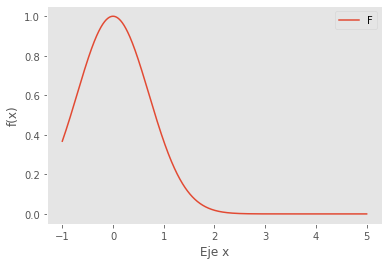

In [64]:
#esta pintando array con respecto a otro array. 
x=np.linspace ( -1,5,num=1000)
plt.plot(x,f(x))

# Añadimos etiquetas
plt.xlabel("Eje x") 
plt.ylabel("f(x)")

# Ademas podemos añadir leyenda
plt.legend ('F')

#tambien lo puedo hacer dentro de la función plot.  
#plt.plot(x,f(x), label="F")
#plt.plot(x,f(x),'or', label="F")

#tambien lo puedo hacer dentro de la función plot.  
#x=np.linspace ( -1,5,num=30)
#plt.plot(x,f(x),'o', label="F")
#plt.plot(x,f(x),'or', label="F")

#desactivar la regilla 
plt.grid(False) 

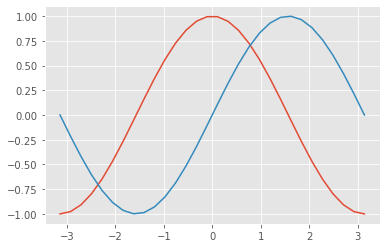

In [65]:
#plot asume que x es primero y los valores de y despues. 

X = np.linspace(-np.pi, np.pi, 30, endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X,C)
plt.plot(X,S)
plt.show()

# PINTAR COSENO ROJO CON PUNTOS


El objeto principal de un gráfico matplotlib es la **figure**,  se puede personalizar cambiando el formato de la línea a dibujar, los puntos, el eje, las escalas... cada parte personalizable de la  gráfica se puede acceder  por las funciones **plt** 

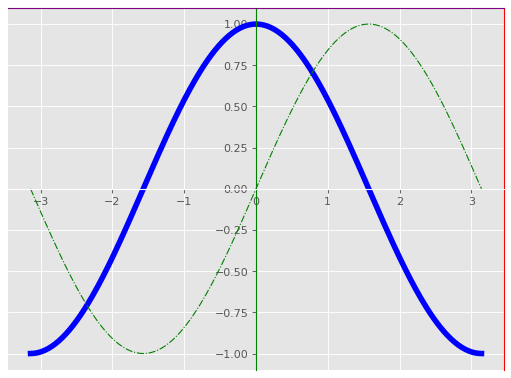

In [66]:
# Creamos una figura de tamaño 8x6 pulgadas, 80 puntos por pulgada
# El metodo figure no renderiza la información solo crea el objeto 
plt.figure(figsize=(8, 6), dpi=80)


# Volvemos a definir X y las funciones seno y coseno
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Trazamos coseno con una linea azul continua de tamaño 5 ( pixels) 
plt.plot(X, C, color="blue", linewidth=5.0, linestyle="-")

# Trazamos seno con una linea azul continua de tamaño 5 ( pixels) : -- -.
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-.")

# Fijamos los límites de x e y 
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)


# movemos los ejes 
ax = plt.gca()  # gca stands for 'get current axe'
ax.spines['right'].set_color('red')
ax.spines['left'].set_color('green')
ax.spines['top'].set_color('purple')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

## 4. The matplotlib object-oriented API

La idea principal de la programación orientada a objetos es tener objetos sobre los que se puedan aplicar funciones y acciones. La ventaja real de este enfoque se pone de manifiesto cuando se crea más de una figura, o cuando una figura contiene más de una subtrama.

Para usar la API orientada a objetos, comenzamos muy parecido al ejemplo anterior, pero en lugar de crear una nueva instancia, almacenamos una referencia a la instancia  recién creada en la variable fig, add_axes 

 If you want to create an Axes at an arbitrary location, simply use the add_axes() method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates:

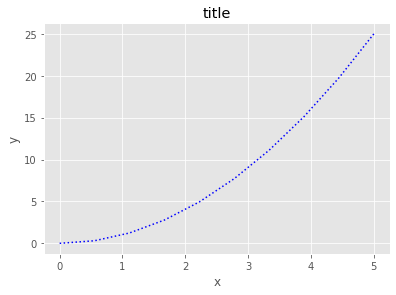

In [67]:
fig = plt.figure()

x = np.linspace(0, 5, 10)
y = x ** 2

# left, bottom, width, height (range 0 to 1)
axes = fig.add_axes([0.3, 0.1, 0.8, 0.8]) 

axes.plot(x, y, 'b:')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Aunque implica un poco más de código, la ventaja es que ahora tenemos control total de donde se colocan los ejes del 
grafico ( plot) , y podemos agregar fácilmente más de un eje a la figura


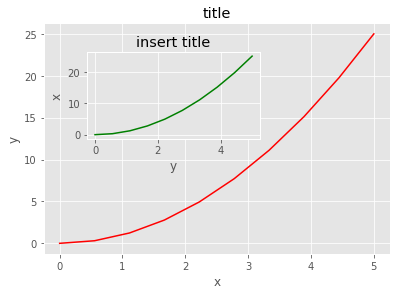

In [68]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(x, y, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');


Si no nos importa ser explícitos acerca de dónde se ubican nuestras visualizaciones , entonces podemos usar **subplots**

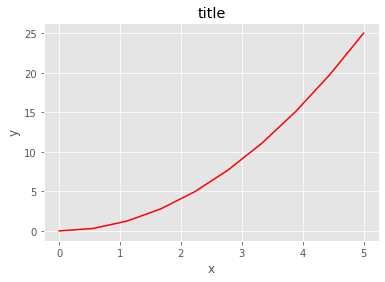

In [69]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


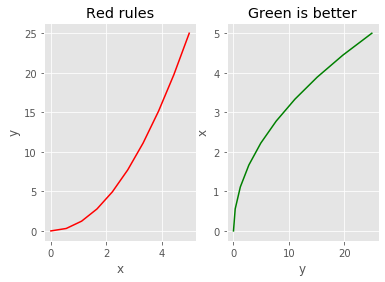

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes[0]
ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Red rules')
    
axes2= axes[1] 
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Green is better');



### 4.1 Tamaño, aspecto ratio DPI de Figure, guardar figuras

Matplotlib permite que la relación de aspecto, el DPI ( pixels por pulgada) y el tamaño de la figura se especifiquen cuando se crea el objeto Figure, utilizando los argumentos de palabras clave de **figsize** y **dpi**. figsize es una tupla del ancho y alto de la figura en pulgadas, y dpi es el punto por pulgada (píxel por pulgada). Para crear una figura de 800x400 píxeles y 100 puntos por pulgada, podemos hacer:

In [71]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Los mismos argumentos también se pueden pasar a otras capas de diseño, como la función **subplots**

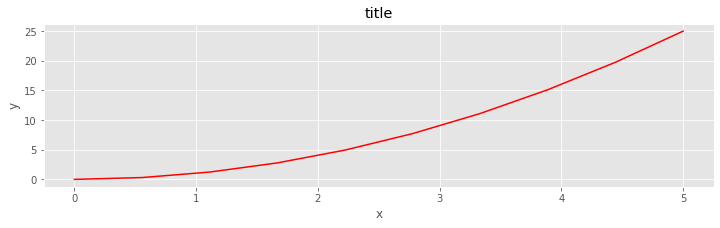

In [72]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');



#### Guardar Figuras

Para guardar una figura en un archivo, podemos usar el método **savefig** en la clase figure

In [73]:
fig.savefig("filename.png")

Aquí también podemos especificar opcionalmente el DPI y elegir entre diferentes formatos de salida:


In [74]:
fig.savefig("filename.png", dpi=200)




### 4.2 ¿Qué formatos están disponibles y cuáles deben usarse para la mejor calidad?
Matplotlib puede generar resultados de alta calidad en varios formatos, incluidos PNG, JPG, EPS, SVG, PGF y PDF.
#### Leyendas, etiquetas y títulos
Ahora que hemos cubierto los conceptos básicos de cómo crear un lienzo de figuras y agregar instancias de ejes al lienzo, veamos cómo decorar una figura con títulos, etiquetas de ejes y leyendas.

#### Títulos de figuras

Se puede agregar un título a cada instancia de eje en una figura. Para establecer el título, use el método set_title en la instancia de ejes:

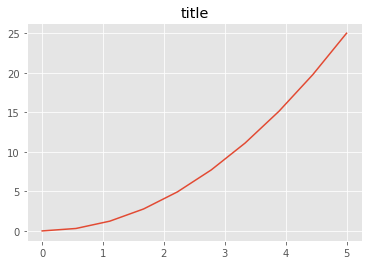

In [75]:
fig, ax = plt.subplots()
ax.plot(x, x**2)
ax.set_title("title");


#### Axis labels

De manera similar, con los métodos set_xlabel y set_ylabel, podemos establecer las etiquetas de los ejes X e Y:


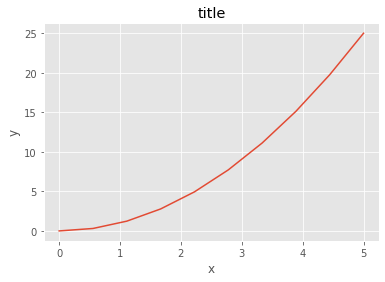

In [76]:
fig, ax = plt.subplots()
ax.plot(x, x**2)
ax.set_title("title");
ax.set_xlabel("x");
ax.set_ylabel("y");

#### Leyendas
Las leyendas para curvas en una figura se pueden agregar de dos maneras. Un método es usar el método de leyenda del objeto del eje y pasar una lista / tupla de textos de leyenda para las curvas definidas previamente:


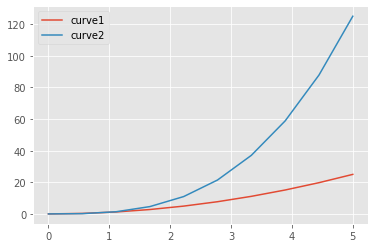

In [77]:
fig, ax = plt.subplots()
ax.plot(x, x**2)
ax.plot(x, x**3)
ax.legend(["curve1", "curve2"]);


Es algo propenso a errores y no flexible si las curvas se agregan o eliminan de la figura (lo que resulta en una curva etiquetada erróneamente).

Un mejor método es utilizar el argumento de palabra clave label = "texto de etiqueta" cuando se agregan gráficos u otros objetos a la figura, y luego se usa el método de leyenda sin argumentos para agregar la leyenda a la figura:


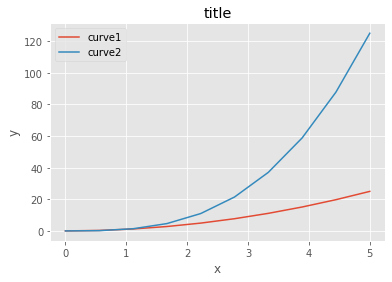

In [78]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();
ax.set_title("title");
ax.set_xlabel("x");
ax.set_ylabel("y");


La ventaja de este método es que si las curvas se agregan o eliminan de la figura, la leyenda se actualiza automáticamente

Argumenots adicionales: 
http://matplotlib.org/users/legend_guide.html#legend-location


In [79]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available


La siguiente figura muestra cómo usar el título de la figura, las etiquetas de los ejes y las leyendas descritas anteriormente:


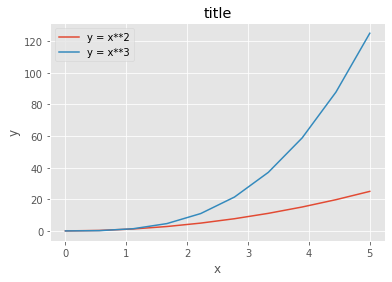

In [80]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');



### 4.3 Formatting text: LaTeX, tamaño y familias de fuentes

La figura anterior es funcional, pero aún no cumple los criterios para una figura utilizada en una publicación. Primero y ante todo, necesitamos tener texto con formato LaTeX, y segundo, necesitamos poder ajustar el tamaño de la fuente para que aparezca en una publicación.

Matplotlib tiene un gran soporte para LaTeX. Todo lo que tenemos que hacer es usar signos de dólar para encapsular LaTeX en cualquier texto (leyenda, título, etiqueta, etc.). Por ejemplo, "$y=x^3$".

Pero aquí podemos encontrarnos con un problema levemente sutil con el código LaTeX y las cadenas de texto de Python. En LaTeX, con frecuencia usamos la barra invertida en los comandos, por ejemplo \ alpha para producir el símbolo α
α
. Pero la barra diagonal inversa ya tiene un significado en cadenas de Python (el carácter de código de escape). Para evitar que Python estropee nuestro código de látex, necesitamos usar cadenas de texto "en bruto". Las cadenas de texto sin formato se anteponen con una 'r', como r "\ alpha" o r '\ alpha' en lugar de "\ alpha" o '\ alpha':




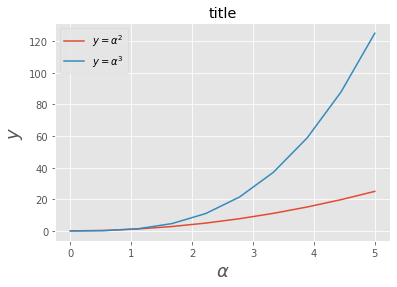

In [81]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

También podemos cambiar el tamaño de fuente global y la familia de fuentes, que se aplica a todos los elementos de texto en una figura (etiquetas de verificación, etiquetas de ejes y títulos, leyendas, etc.):


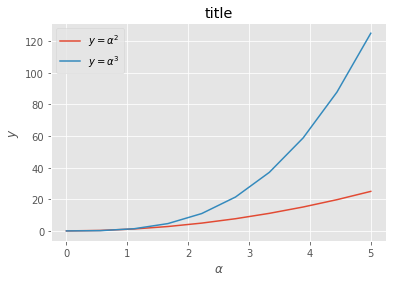

In [82]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');




### 4.4 Configuración de colores, anchos de lineas y tipos de lineas , etc...
#### Colores

Con matplotlib, podemos definir los colores de las líneas y otros elementos gráficos de varias maneras. En primer lugar, podemos utilizar la sintaxis similar a MATLAB donde 'b' significa azul, 'g' significa verde, etc. También se admite la API de MATLAB para seleccionar estilos de línea: donde, por ejemplo, 'b.-' significa un línea azul con puntos:


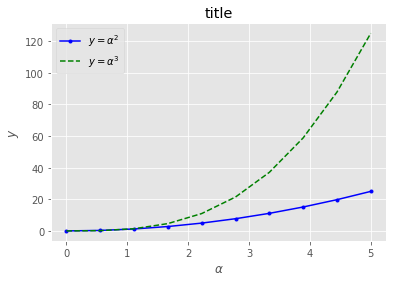

In [83]:
# MATLAB style line color and style 
fig, ax = plt.subplots()

ax.plot(x, x**2,'b.-', label=r"$y = \alpha^2$")# blue line with dots
ax.plot(x, x**3,'g--', label=r"$y = \alpha^3$")# green dashed line
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

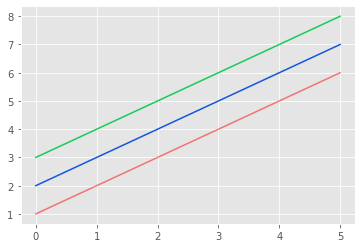

In [84]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color



#### Estilos de línea y marcador

Para cambiar el ancho de línea, podemos usar el argumento de línea de ancho de línea o lw. El estilo de línea se puede seleccionar usando los argumentos de la palabra clave linestyle o ls:


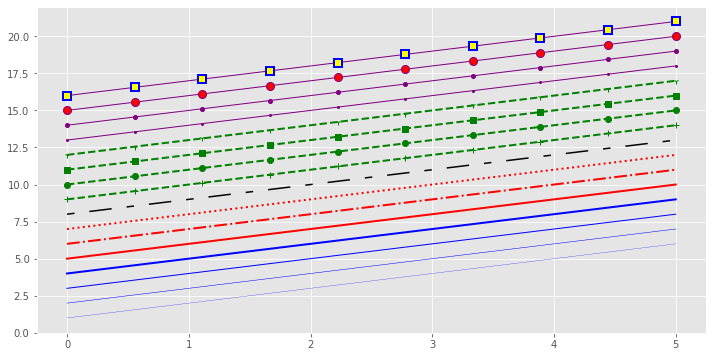

In [85]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");




#### Control sobre los ejes

#### Escala logarítmica
También es posible establecer una escala logarítmica para uno o ambos ejes. Esta funcionalidad es, de hecho, solo una aplicación de un sistema de transformación más general en Matplotlib. Cada una de las escalas de los ejes se establece por separado utilizando los métodos set_xscale y set_yscale que aceptan un parámetro (con el valor "log" en este caso):


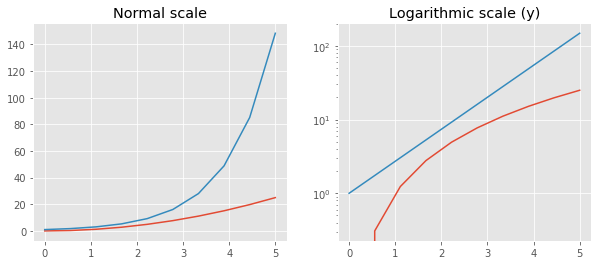

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

#### Colocación de marcas y etiquetas personalizadas

Podemos determinar explícitamente dónde queremos los tics del eje con set_xticks y set_yticks, que ambos toman una lista de valores de dónde se colocarán los ticks en el eje. También podemos usar los métodos set_xticklabels y set_yticklabels para proporcionar una lista de etiquetas de texto personalizadas para cada ubicación de tick:



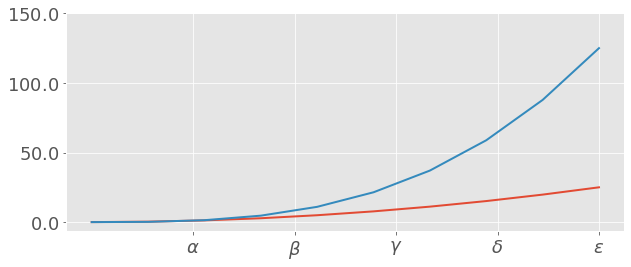

In [87]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels


Hay un número de métodos más avanzados para controlar la colocación principal y menor de la señal en las figuras , tales como colocación automática según diversas políticas. 

Consulte http://matplotlib.org/API/ticker_api.html para obtener más información.
* **Notación científica**
Con grandes números en los ejes, a menudo es mejor utilizar la notación científica:

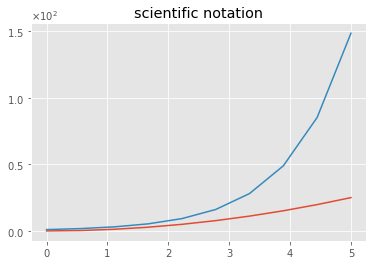

In [88]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)


#### Ajustes de posición del eje

Desafortunadamente, al guardar figuras, las etiquetas a veces se recortan, y puede ser necesario ajustar un poco las posiciones de los ejes. Esto se puede hacer usando subplots_adjust:



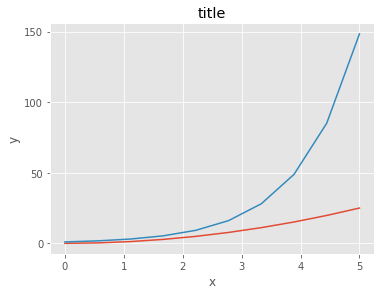

In [89]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

#### Cuadrícula de ejes ( Rejillas)
Con el método de cuadrícula en el objeto del eje, podemos activar y desactivar las líneas de la cuadrícula. También podemos personalizar la apariencia de las líneas de cuadrícula utilizando los mismos argumentos de palabra clave como la función de trazado:


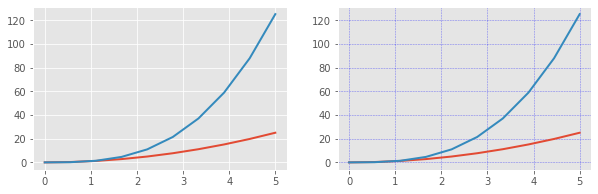

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)



#### Axis spines






We can also change the properties of axis spines:


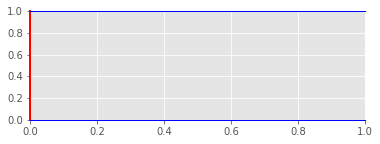

In [91]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

#### Twin axes¶

A veces es útil tener dos ejes x o y en una figura; por ejemplo, al trazar curvas con diferentes unidades juntas. Matplotlib soporta esto con las funciones twinx y twiny:


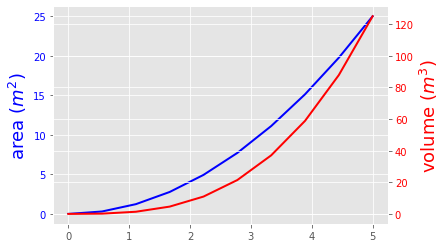

In [92]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")



#### Text annotation






Annotating text in matplotlib figures can be done using the text function. It supports LaTeX formatting just like axis label texts and titles:


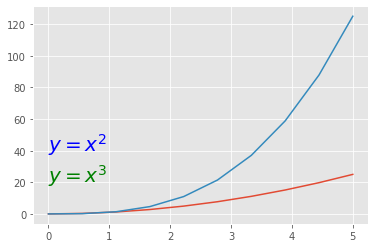

In [93]:
##https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html
fig, ax = plt.subplots()

ax.plot(x, x**2, x, x**3)

ax.text(0., 40, r"$y=x^2$", fontsize=20, color="blue");
ax.text(0., 20, r"$y=x^3$", fontsize=20, color="green");


# Anexo - Contornos, 2D Y 3D

In [94]:
n = np.array([0,1,2,3,4,5])

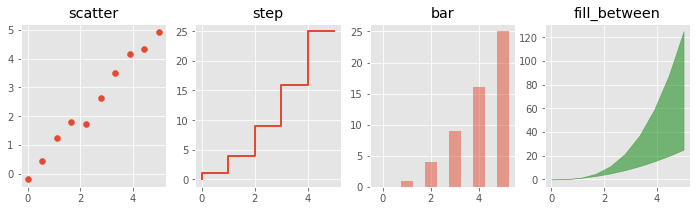

In [95]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(x, x + 0.25*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");







### Mapa de colores y figuras de contorno

Los mapas de colores y las figuras de contorno son útiles para trazar funciones de dos variables. En la mayoría de estas funciones, usará un mapa de colores para codificar una dimensión de los datos. Hay una serie de mapas de color predefinidos. Es relativamente sencillo definir mapas de color personalizados. Para obtener una lista de mapas de color predefinidos, consulte:


 http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps


In [96]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [97]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

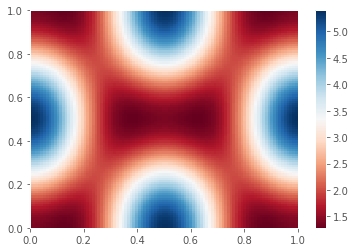

In [98]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)


#### imshow

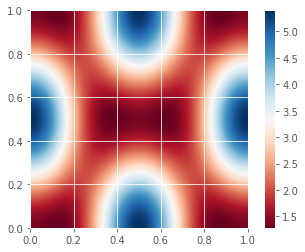

In [99]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### Contour

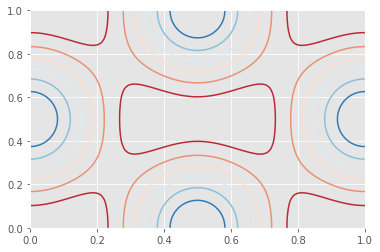

In [100]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

### Figuras 3D
Para usar gráficos 3D en matplotlib, primero necesitamos crear una instancia de la clase Axes3D. Los ejes 3D se pueden agregar a un lienzo de figuras matplotlib exactamente de la misma manera que los ejes 2D; o, más convenientemente, pasando un argumento de palabra clave de proyección = '3d' a los métodos 


In [101]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### surface plots

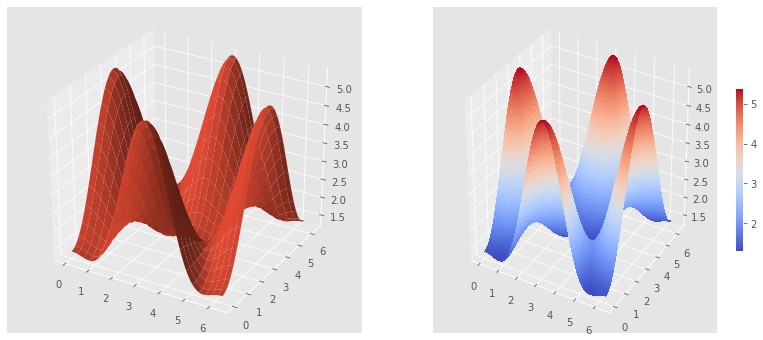

In [102]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plots

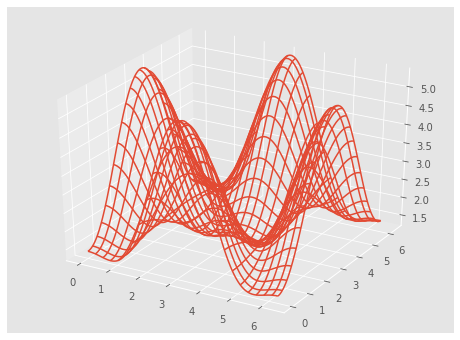

In [103]:

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)


#### Graficos de contorno con proyección

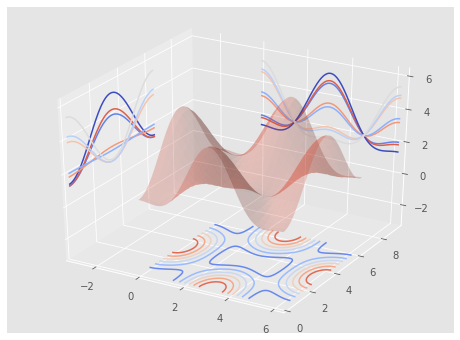

In [104]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Cambiar el ángulo de visión
Podemos cambiar la perspectiva de un gráfico en 3D usando el método view_init, que toma dos argumentos: elevación y ángulo acimutal (en grados) 


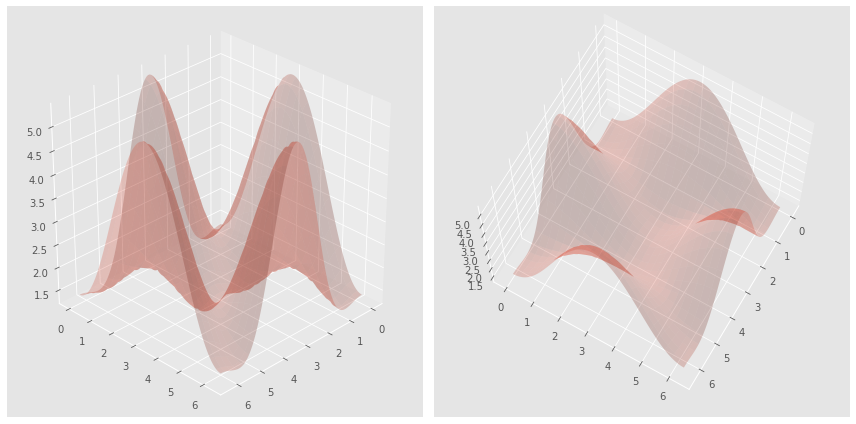

In [105]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()